In [2]:
# Data manipulation and numerical operations
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and statistical models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
#!pip install catboost scikit-learn
#from catboost import CatBoostRegressor

#scale all numerical features and y data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Deep learning
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive
from google.colab import files
import pandas as pd
import pandas as pd
import numpy as np
from tabulate import tabulate
import re
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import joblib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# # Please download csv dataset from kaggle: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge and put it in GoogleDrive

# # Mount Google Drive
# drive.mount('/content/drive')

# # Path to your file
# file_path = '/content/drive/My Drive/car_price_prediction.csv'

# # Load the data into a DataFrame
# df = pd.read_csv(file_path)

# df.head()

In [32]:
# # Mount Google Drive
drive.mount('/content/drive')

car_data_folder = '/content/drive/My Drive/cardata/'

file_paths = {
    'audi': car_data_folder + 'audi.csv',
    'bmw': car_data_folder + 'bmw.csv',
    #'cclass': car_data_folder + 'cclass.csv',
    #'focus': car_data_folder + 'focus.csv',
    'ford': car_data_folder + 'ford.csv',
    'hyundi': car_data_folder + 'hyundi.csv',
    'merc': car_data_folder + 'merc.csv',
    'skoda': car_data_folder + 'skoda.csv',
    'toyota': car_data_folder + 'toyota.csv',
    'vauxhall': car_data_folder + 'vauxhall.csv',
    'vw': car_data_folder + 'vw.csv'
}

car_data=[]

for key,value in file_paths.items():
  temporary_df=pd.read_csv(value)
  temporary_df['brand']=str(key)
  if key=='hyundi':
    temporary_df.rename(columns={'tax(£)':'tax'},inplace=True)
  car_data.append(temporary_df)

# Concatenate all DataFrames in the list
df = pd.concat(car_data, ignore_index=True)

# Drop exact duplicate rows
df.drop_duplicates(inplace=True)

# Define the file path in your Google Drive
#file_path = '/content/drive/My Drive/combinedcardatafinal.csv'

# Save the DataFrame to the specified file path
#df.to_csv(file_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0
brand,0


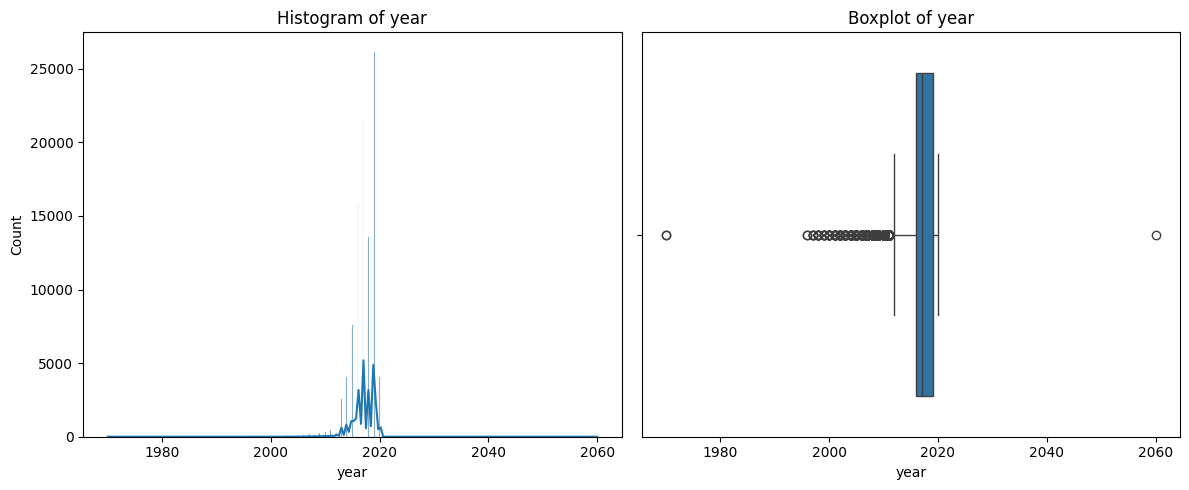

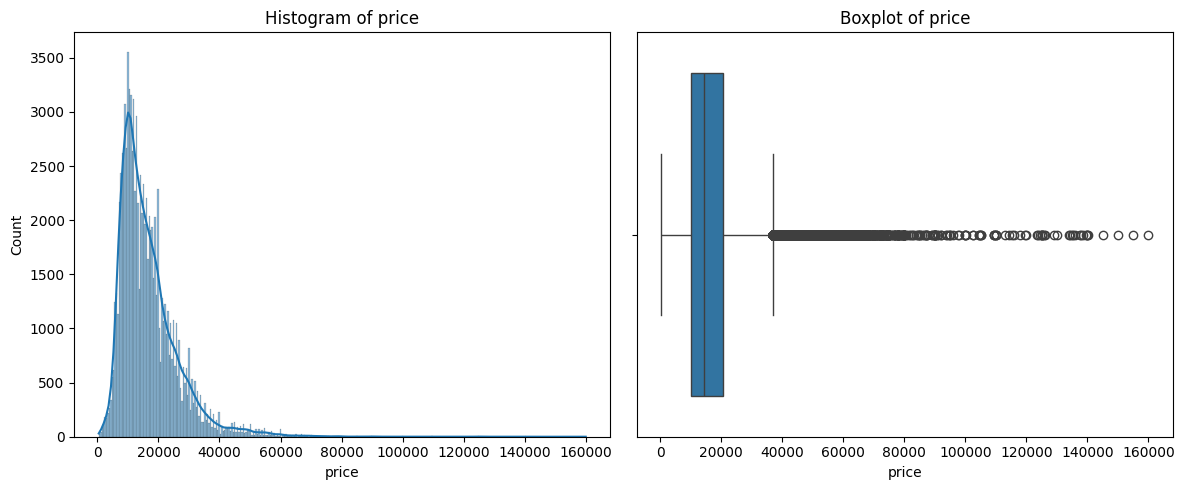

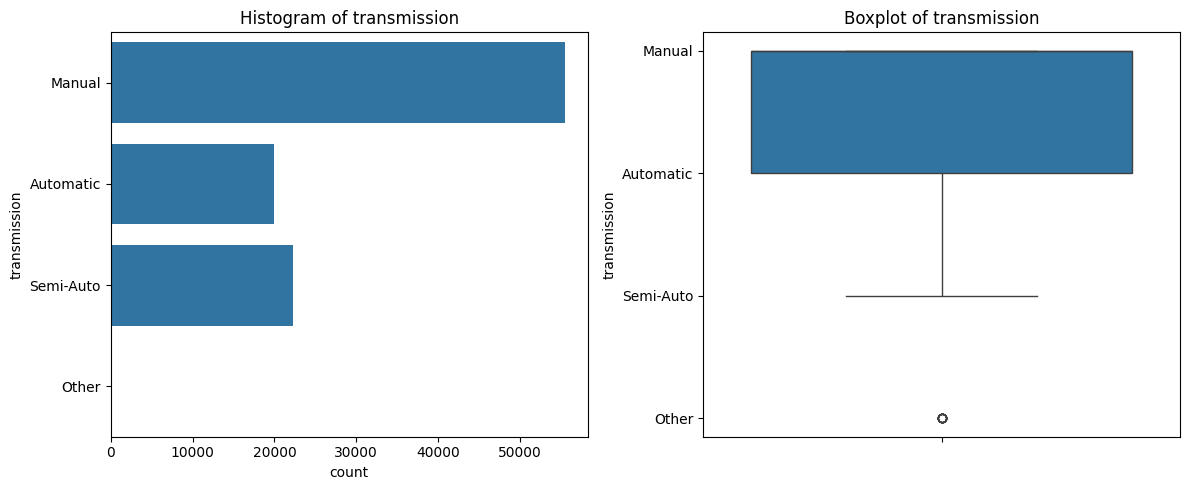

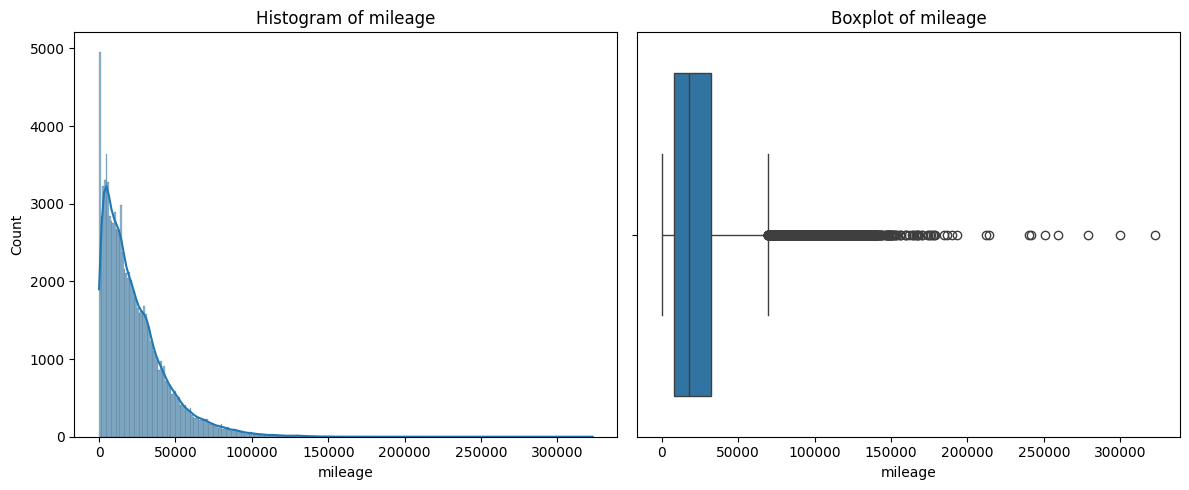

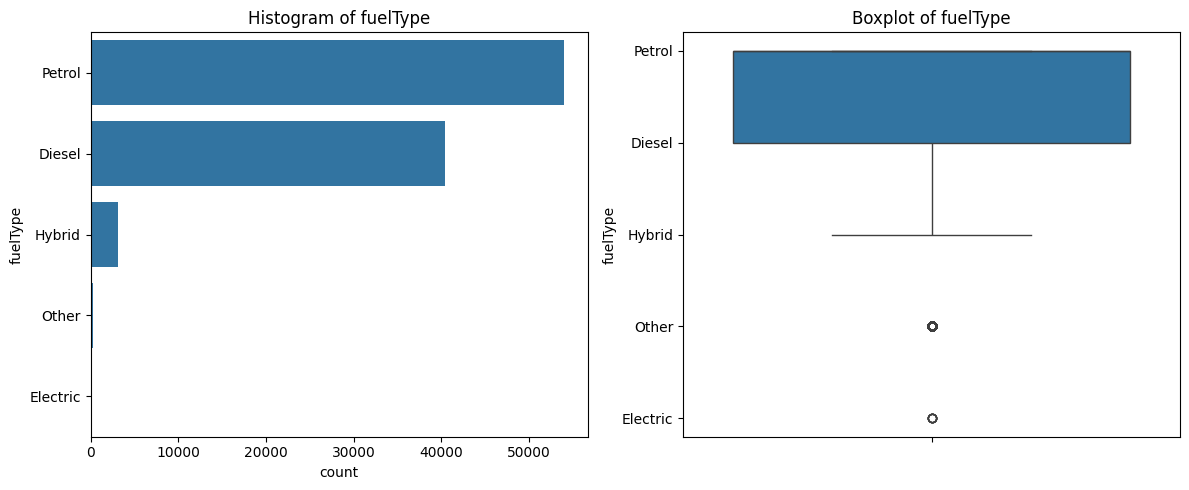

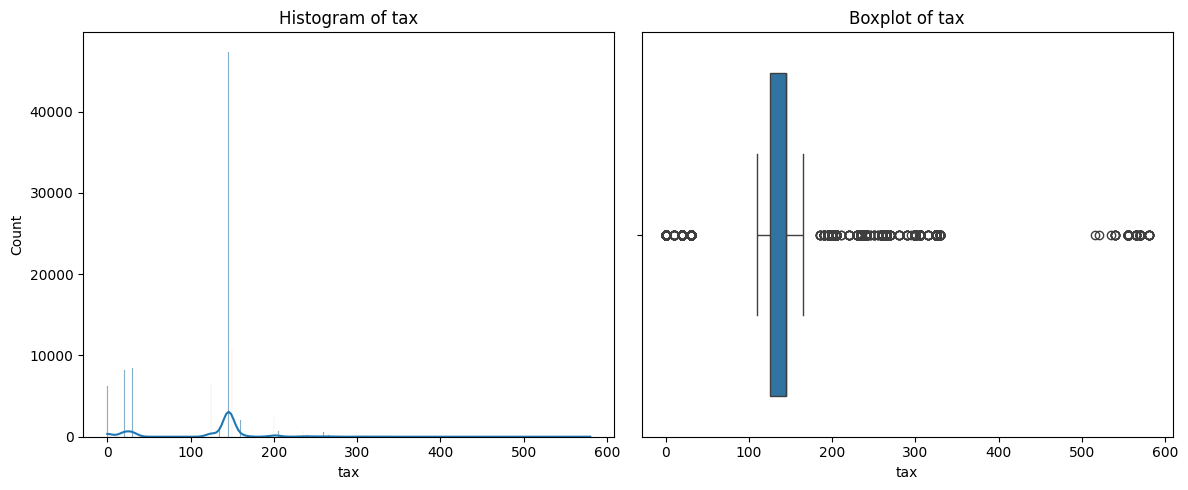

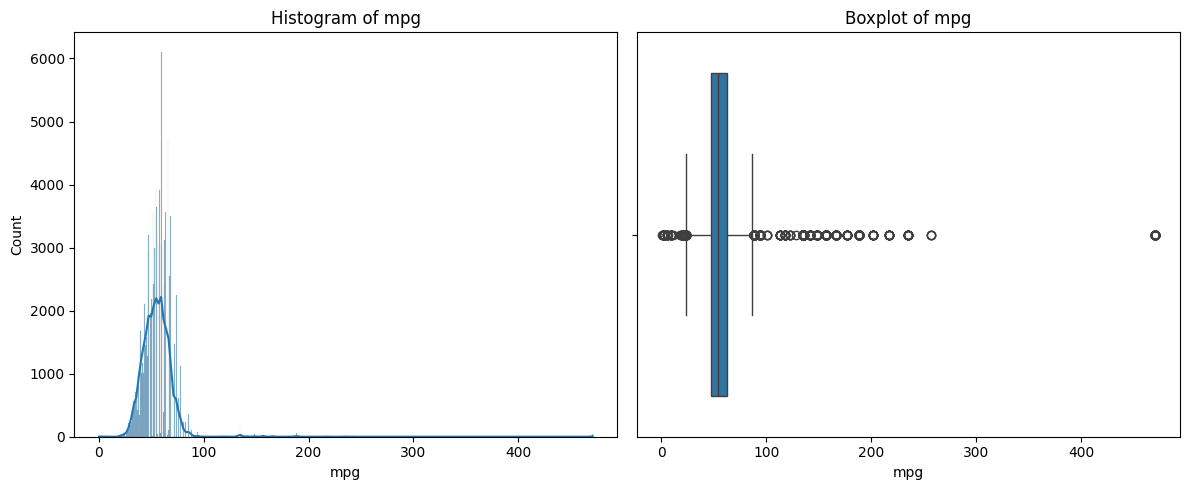

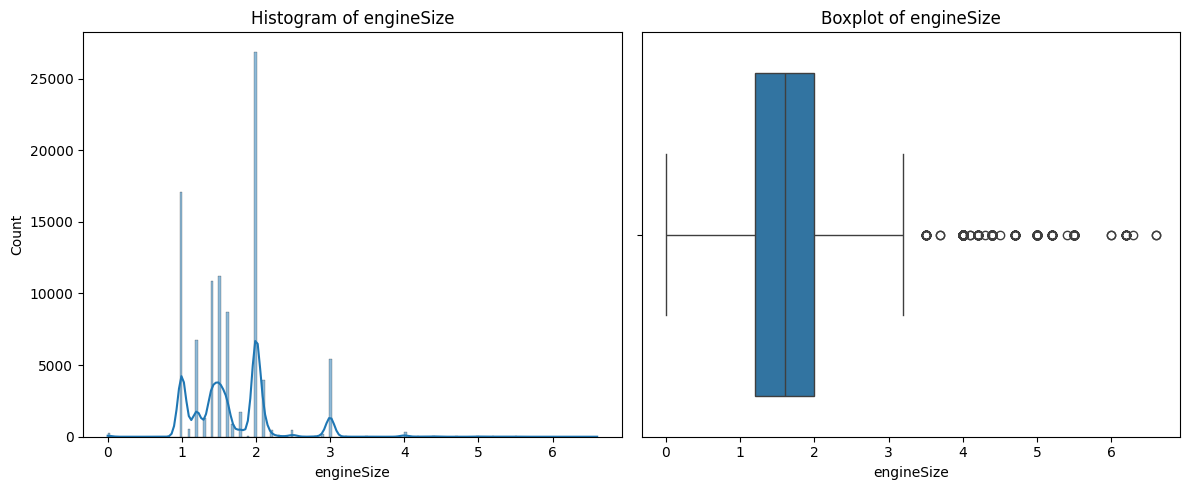

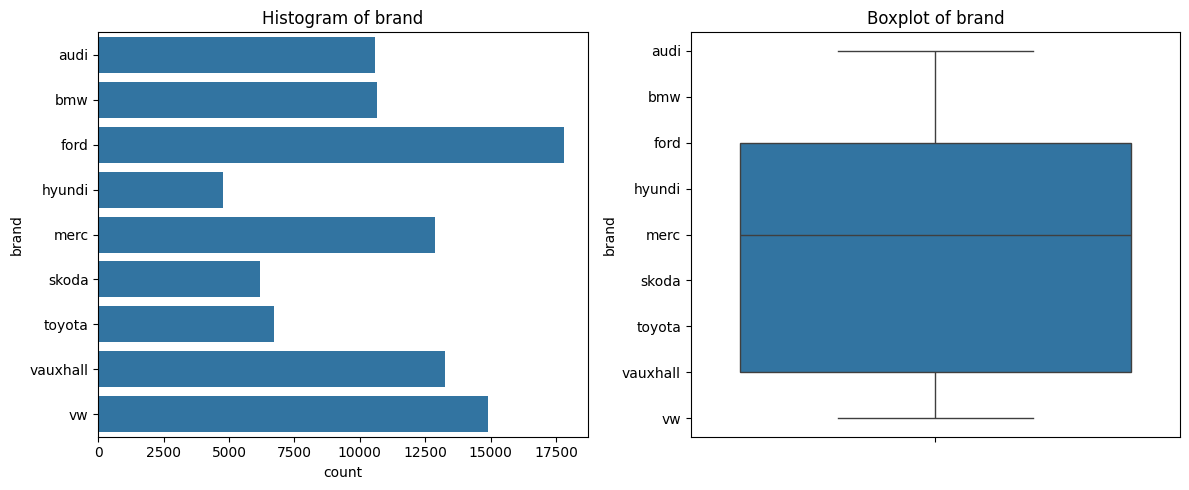

In [14]:
# List of variables to plot
variables = ['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'brand']

# Create plots
for var in variables:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    if df[var].dtype in ['int64', 'float64']:
        sns.histplot(df[var], kde=True)
    else:
        sns.countplot(y=df[var])
    plt.title(f'Histogram of {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    if df[var].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[var])
    else:
        sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')

    plt.tight_layout()
    plt.show()


In [29]:
#Split labels
column_names_list = list(df.columns)
column_names_list.remove('price')
X_train=df[column_names_list]
Y_train=df['price']

# Split the data into training and validation sets 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [24]:
#Baseline Linear Regression model - using only numerical features
model = LinearRegression()

#define categorical and numerical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()

# Train the model
model.fit(X_train[numerical_features], y_train)

# Make predictions
y_pred = model.predict(X_test[numerical_features])

# Evaluate the model using MAPE and R^2
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAPE: {mape:.4f}')
print(f'R^2: {r2:.4f}')

MAPE: 29.6399
R^2: -20130230.9306


In [33]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

#Feature engineering for model 3
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features=df.select_dtypes(include=['number']).columns.tolist()

# Fit and transform the categorical features of the training set
df_cat = pd.DataFrame(encoder.fit_transform(df[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# Reset index to avoid index misalignment issues
df_cat.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Concatenate the transformed categorical features and the original numerical features
df = pd.concat([df_cat,df[numerical_features]], axis=1)

print('df shape after onehot',df.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


df shape after onehot (97712, 219)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

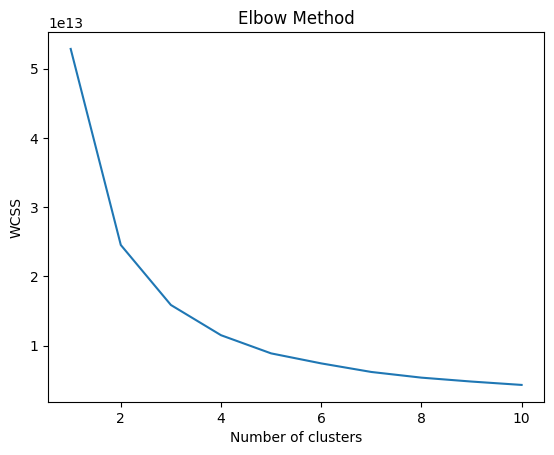

In [38]:
# KMeans - how many clusters?
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
#KMeans Clustering and Imputation using Cluster Average - optimal clusters = 10 from elbow method above

#Before imputation
print('Before:')
print(df[numerical_features].isnull().sum())
print((df['tax'] == 0).sum())
print((df['mpg'] == 0).sum())
print((df['engineSize'] == 0).sum())
print('average of tax before imputation',df['tax'].mean())
print('average of engineSize before imputation',df['engineSize'].mean())

#impute zero values and nulls with cluster average
# List of features including the target variable 'price' but without the two features that have a lot of 0s to impute
features = df.drop(columns=['tax','engineSize']).columns.tolist()

# Perform KMeans clustering with the optimal number of clusters 3
n_clusters = 10
#calculate clusters using KMeans then assign cluster labels to each row
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['cluster_labels'] = kmeans.fit_predict(df[features])

# Function to impute cluster averages
def impute_cluster_average(df, column, cluster_column):
    #list of unique cluster values in column
    clusters = df[cluster_column].unique()
    #for each cluster
    for cluster in clusters:
        #get all of the data in one cluster
        cluster_data = df[df[cluster_column] == cluster]
        #compute the cluster mean that is non-zero
        cluster_mean = cluster_data[column][cluster_data[column] != 0].mean()

        # Handle NaN values: Replace NaN cluster mean with global mean or another default value
        if pd.isna(cluster_mean):
            #if the cluster mean is null use the overall average of the column
            cluster_mean = df[column][df[column] != 0].mean()
        #replace 0s in the column within the cluster with the cluster mean
        df.loc[(df[cluster_column] == cluster) & (df[column] == 0), column] = cluster_mean
    return df

# Impute cluster averages for the 'column_to_impute'
df = impute_cluster_average(df, 'tax', 'cluster_labels')
df = impute_cluster_average(df, 'engineSize', 'cluster_labels')

print('average of tax after imputation',df['tax'].mean())
print('average of engineSize after imputation',df['engineSize'].mean())

Before:
year          0
price         0
mileage       0
tax           0
mpg           0
engineSize    0
dtype: int64
6259
0
268
average of tax before imputation 120.14240830194858
average of engineSize before imputation 1.6649132143441951


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-34-254f353fcbfd>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '120.15709438230489' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[cluster_column] == cluster) & (df[column] == 0), column] = cluster_mean


average of tax after imputation 127.45725832073938
average of engineSize after imputation 1.6694732588882264


In [35]:
#Split labels
column_names_list = list(df.columns)
column_names_list.remove('price')
X_train=df[column_names_list]
Y_train=df['price']

# Split the data into training and validation sets 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Verify the shape of the concatenated dataframes
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

# Print the shapes of the target dataframes
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (58626, 219)
X_val shape: (19543, 219)
X_test shape: (19543, 219)
y_train shape: (58626,)
y_val shape: (19543,)
y_test shape: (19543,)


In [19]:
#Do not run this cell
#Do not run this cell
#Do not run this cell
#Do not run this cell

#We will be scaling numerical features including one-hot encoded categorical features

#scale all numerical features and y data
from sklearn.preprocessing import StandardScaler

#inititalize scaler
scaler=StandardScaler()

#store categorical columns and numerical as a list
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features=X_train.select_dtypes(include=['number']).columns.tolist()

# Fit and transform the numerical features of the training set
X_train = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), columns=numerical_features)
X_test = pd.DataFrame(scaler.transform(X_test[numerical_features]), columns=numerical_features)
X_val = pd.DataFrame(scaler.transform(X_val[numerical_features]), columns=numerical_features)

# Verify the shape of the concatenated dataframes
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

#scale y
y_train=scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test=scaler.fit_transform(np.array(y_test).reshape(-1,1))
y_val=scaler.fit_transform(np.array(y_val).reshape(-1,1))

# Print the shapes of the target dataframes
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

#shapes should match before because we are label encoding instead of one-hot encoding

X_train shape: (58626, 218)
X_val shape: (19543, 218)
X_test shape: (19543, 218)
y_train shape: (58626, 1)
y_val shape: (19543, 1)
y_test shape: (19543, 1)


In [36]:
#Linear Regression model post data processing
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using MAPE and R^2
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAPE: {mape:.4f}')
print(f'R^2: {r2:.4f}')

#MAPE to beat is 28%

MAPE: 93.9466
R^2: -203960052.2815


In [37]:
#random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_percentage_error

# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_regressor.predict(X_val)

# Predict on the validation set
y_test_pred = rf_regressor.predict(X_test)

# Calculate MAPE on the validation set
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
print(f'Validation MAPE: {val_mape:.2%}')
# Calculate MAPE on the test set
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f'Test MAPE: {test_mape:.2%}')


#7.38%

#7.01% one-hot encode, KMeans cluster average impute

Validation MAPE: 7.01%
Test MAPE: 7.07%


In [38]:
#XGBoost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # For regression
    'eta': 0.1,
    'max_depth': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred = bst.predict(dtest)

# Evaluate the model using MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape:.4f}')

#6.93%

#6.5%

MAPE: 0.0651


In [ ]:
#XGBoost optimized

import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# Set up the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [15, 20, 25],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=3, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best MAPE: {best_score:.4f}")

# Train the final model with the best parameters
final_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_test)

# Evaluate the model using MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE on test data: {mape:.4f}')

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


In [39]:
#try a model with dropouts and early stopping
model_fnn_2 = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model_fnn_2.compile(optimizer='adam', loss='mean_absolute_percentage_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_fnn_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=True)

# Make predictions
y_pred = model_fnn_2.predict(X_test)

# Evaluate the model using MAPE and R^2
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAPE: {mape:.4f}')
print(f'R^2: {r2:.4f}')

# 18%

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 47.7911 - val_loss: 34.8316
Epoch 2/100
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 36.0266 - val_loss: 34.2415
Epoch 3/100
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 35.1330 - val_loss: 33.9483
Epoch 4/100
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 34.7220 - val_loss: 33.0662
Epoch 5/100
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 32.4369 - val_loss: 27.3285
Epoch 6/100
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 28.3152 - val_loss: 22.7137
Epoch 7/100
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 25.4324 - val_loss: 21.0503
Epoch 8/100
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 23.7736 - val_loss: 19.5011
Epoch 9/100
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 23.0503 - val_loss: 18.8400
Epoch 10/100
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.2863 - val_loss: 20.9863
Epoch 11/100
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.1664 - val_loss: 18.8

In [ ]:
## Notes

## Why does scaling reduce performance?

## What should the order be -> clean, one-hot encode, impute, split, train, test, deploy?

## how do we know we have a final model?

